In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Monte Carlo Test

## Being Given Measurments

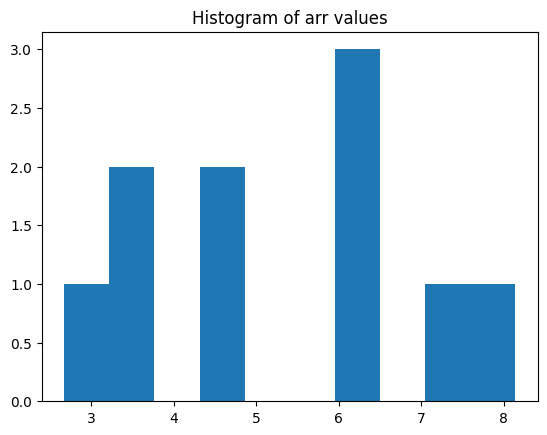

In [10]:
arr = np.array([6.20, 4.34, 8.14, 6.24, 3.72, 3.54, 4.35, 2.67, 7.16, 6.00])

plt.hist(arr)
plt.title("Histogram of arr values")
plt.show()

## Mean and Standard deviation of measurments

In [11]:
mean = np.mean(arr)
std = np.std(arr)

print(f"{mean=} +/- {std}")

mean=5.236 +/- 1.6734049121476848


## Sampling from Normal Distribution with given parameters and Calculating mean

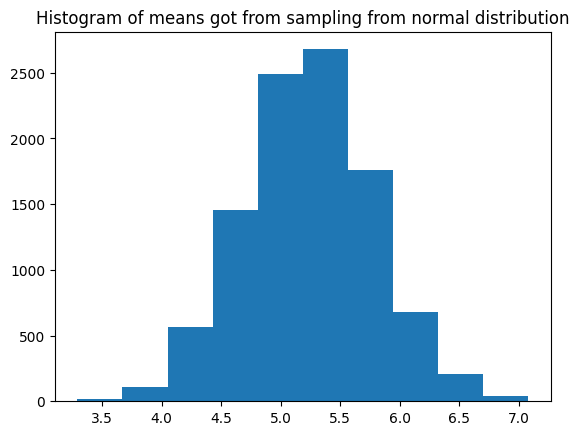

In [12]:
N = int(1e4)
np.random.seed(42)

sampled_means = []


for i in range(N):
    sampled_means.append(np.mean(np.random.normal(loc=mean, scale=std, size=len(arr))))

plt.hist(sampled_means)
plt.title("Histogram of means got from sampling from normal distribution")
plt.show()

## Confidence intervals and observations greater than mean of arr

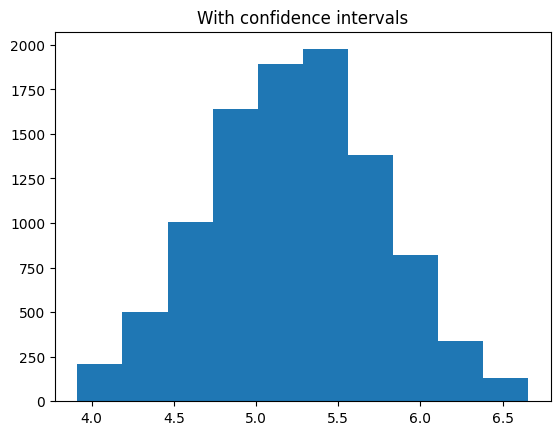

With applied confidence intervals sampled means ranges in [3.913990455894247, 6.656226081125668]
There is 4982 samples greater than mean=5.236 being 51.0%


In [13]:
alpha = 0.005

sampled_means = sorted(sampled_means)[int(N * alpha):-int(N*alpha)]
plt.hist(sampled_means)
plt.title("With confidence intervals")
plt.show()

N_above_mean = np.sum([1 if s > mean else 0 for s in sampled_means ])

print(f"With applied confidence intervals sampled means ranges in [{sampled_means[0]}, {sampled_means[-1]}]")
print(f"There is {N_above_mean} samples greater than {mean=} being {np.ceil(N_above_mean/len(sampled_means)*100)}%")

# Bootstrap Test

## Being given array

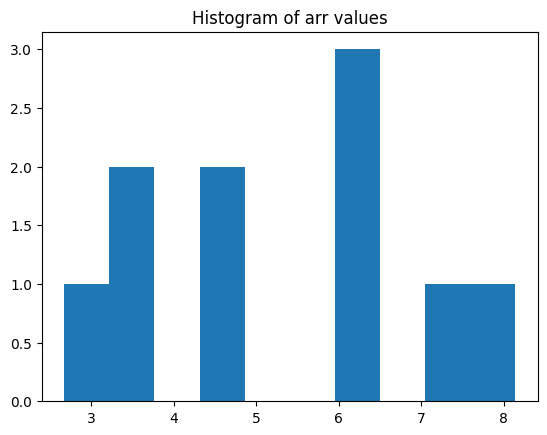

In [14]:
arr = np.array([6.20, 4.34, 8.14, 6.24, 3.72, 3.54, 4.35, 2.67, 7.16, 6.00])

plt.hist(arr)
plt.title("Histogram of arr values")
plt.show()

## Testing a hypothesis

$H_0$: Expected value of population is equal to 0
$$
H_0: \space \mu = 0
$$

mean=5.236 +/- 1.6734049121476848


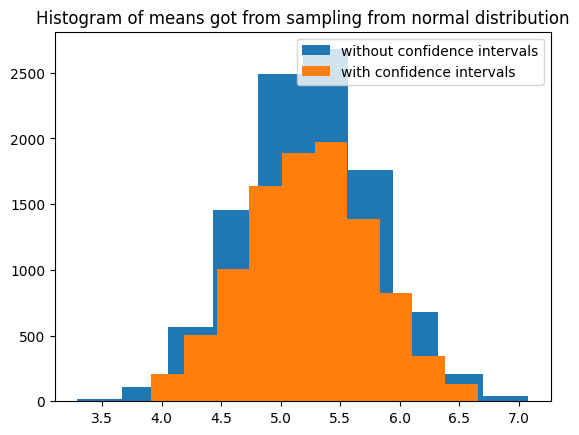

values with confidence intervals ranges in [5.985787665259052, 5.622431775992102]
There is 9900 values above mean=5.236


In [15]:
N = int(1e4)
np.random.seed(42)

mean = np.mean(arr)
std = np.std(arr)
print(f"{mean=} +/- {std}")

sampled_means = []
for i in range(N):
    sampled_means.append(np.mean(np.random.normal(loc=mean, scale=std, size=len(arr))))




## Applaing confidence intervals
alpha = 0.005

sampled_means_ci = sorted(sampled_means)[int(N * alpha):-int(N*alpha)]


plt.hist(sampled_means, label="without confidence intervals")
plt.hist(sampled_means_ci, label="with confidence intervals")
plt.title("Histogram of means got from sampling from normal distribution")
plt.legend()
plt.show()

print(f"values with confidence intervals ranges in [{sampled_means[0]}, {sampled_means[-1]}]")
print(f"There is {np.sum([1 if m>0 else 0 for m in sampled_means_ci])} values above {mean=}")

### Hypothesis $H_0$ is not true

# Permutation Test

## Data
We are given measurments of Cortisol level in blood for high or low dose of blude light

low_mean=294.90909090909093 +/- 57.473242067235155
high_mean=231.35294117647058 +/- 52.144528985447614


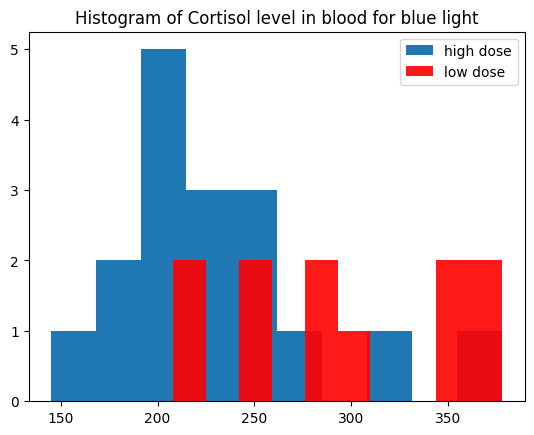

In [21]:
low_dose = np.array([378, 346,245,285,365,245,208,360,296,224,292])
high_dose = np.array([218,264,211,180,256,240, 261, 205, 145, 195, 187,210,378, 204, 232, 237,310])

low_mean = np.mean(low_dose)
low_std = np.std(low_dose)

high_mean = np.mean(high_dose)
high_std = np.std(high_dose)

plt.hist(high_dose, label="high dose")
plt.hist(low_dose, label="low dose", alpha=0.9, color="red")

print(f"{low_mean=} +/- {low_std}\n{high_mean=} +/- {high_std}")
plt.title("Histogram of Cortisol level in blood for blue light")
plt.legend()
plt.show()


## Null Hypothesis
$H_0$: blood cortisol level is not related with blue light dose

## Permutation Test

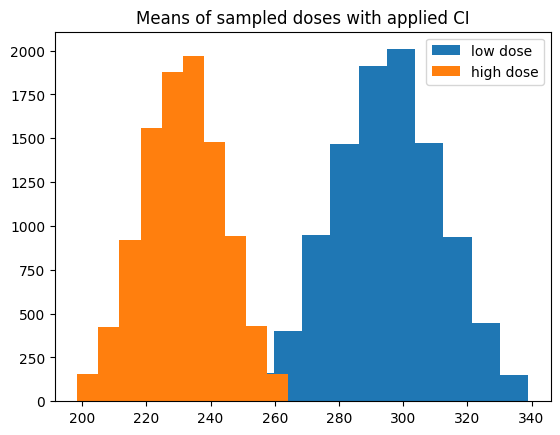

In [23]:
N = int(1e4)
np.random.seed(42)

all_doses = np.concatenate((low_dose, high_dose))


sampled_means_low = []
sampled_means_high = []

for i in range(N):
    sampled_means_low.append(np.mean(np.random.normal(loc=low_mean, scale=low_std, size=len(low_dose))))
    sampled_means_high.append(np.mean(np.random.normal(loc=high_mean, scale=high_std, size=len(high_dose))))

# Apply confidence intervals
alpha = 0.005
sampled_means_low = sorted(sampled_means_low)[int(N * alpha):-int(N*alpha)]
sampled_means_high = sorted(sampled_means_high)[int(N * alpha):-int(N*alpha)]

plt.title("Means of sampled doses with applied CI")
plt.hist(sampled_means_low, label="low dose")
plt.hist(sampled_means_high, label="high dose")
plt.legend()
plt.show()
